Dataset: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

Air Quality Data in India (2015 - 2020)
Content
The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

- Performing EDA, visualization and data preparation and processing,
- clustering and anomaly eliminations
- build various ml models using auto ml including ensemble model - using autoviml

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamkothiya","key":"a1eda756dfe1d6506bc03340c305eebb"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d rohanrao/air-quality-data-in-india

Dataset URL: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india
License(s): CC0-1.0
 78% 57.0M/72.9M [00:01<00:00, 59.4MB/s]
100% 72.9M/72.9M [00:01<00:00, 67.3MB/s]


In [5]:
!unzip air-quality-data-in-india.zip

Archive:  air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


In [6]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [7]:
!find /usr/local/lib/python3.10/dist-packages/ -type f -name "Auto_ViML.py"


/usr/local/lib/python3.10/dist-packages/autoviml/Auto_ViML.py


In [8]:
!sed -i 's/from scipy import interp/import numpy as np\ninterp = lambda x, xp, fp: np.interp(x, xp, fp)/' /usr/local/lib/python3.10/dist-packages/autoviml/Auto_ViML.py


In [9]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('city_day.csv')

# View first few rows
print(data.head())

# Check column names and data types
print(data.info())

# Summary statistics
print(data.describe())


        City        Date  PM2.5  PM10    NO   NO2   NOx  NH3    CO   SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN  0.92 18.22 17.15  NaN  0.92 27.64   
1  Ahmedabad  2015-01-02    NaN   NaN  0.97 15.69 16.46  NaN  0.97 24.55   
2  Ahmedabad  2015-01-03    NaN   NaN 17.40 19.30 29.70  NaN 17.40 29.07   
3  Ahmedabad  2015-01-04    NaN   NaN  1.70 18.48 17.97  NaN  1.70 18.59   
4  Ahmedabad  2015-01-05    NaN   NaN 22.10 21.42 37.76  NaN 22.10 39.33   

      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0 133.36     0.00     0.02    0.00  NaN        NaN  
1  34.06     3.68     5.50    3.77  NaN        NaN  
2  30.70     6.80    16.40    2.25  NaN        NaN  
3  36.08     4.43    10.14    1.00  NaN        NaN  
4  39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  o

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


# Time Series Analysis of Air Quality Data

## Visualizing pollutant concentrations over time

* Convert date column to datetime format and sort data chronologically
* Plot time series of PM2.5 and PM10 concentrations
* Calculate and visualize monthly trends for PM2.5
* Identify seasonal patterns and long-term trends in air quality



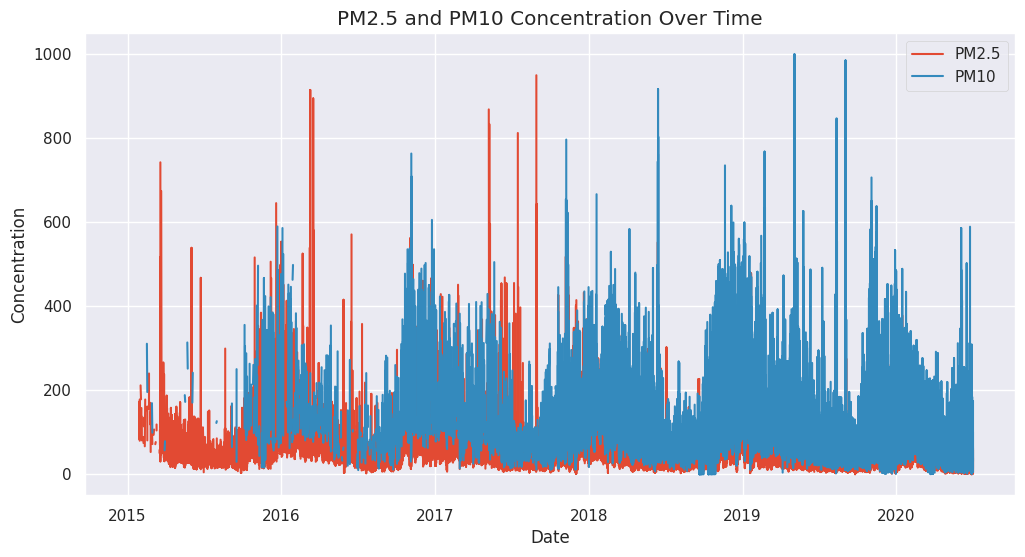

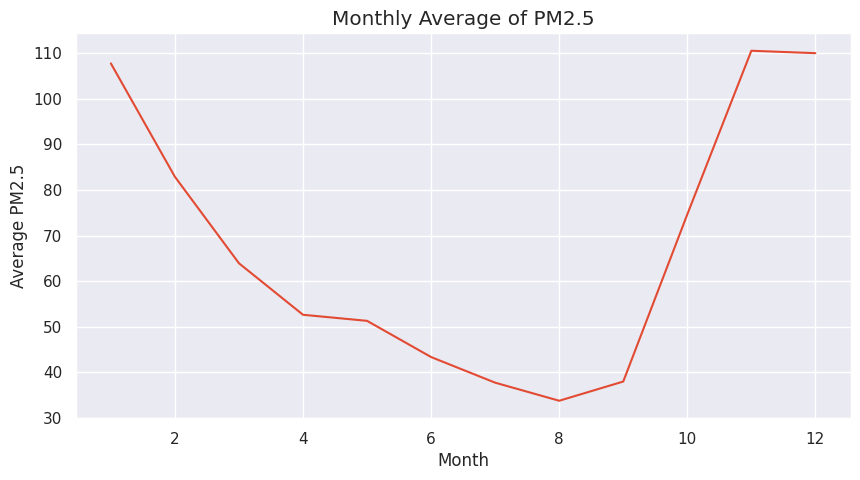

In [12]:
# Convert the 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Sort data by date (important for time series)
data = data.sort_values(by='Date')

# Plot time series for key pollutants (example: PM2.5, PM10)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['PM2.5'], label='PM2.5')
plt.plot(data['Date'], data['PM10'], label='PM10')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('PM2.5 and PM10 Concentration Over Time')
plt.legend()
plt.show()

# Monthly trends for PM2.5
data['Month'] = data['Date'].dt.month
monthly_pm25 = data.groupby('Month')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_pm25.index, y=monthly_pm25.values)
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Monthly Average of PM2.5')
plt.show()


# Data Preprocessing for Time Series Analysis

## Handling missing values, duplicates, and feature engineering

* Check and impute missing values using forward and backward fill
* Remove duplicate entries to ensure data integrity
* Convert categorical features to numerical using one-hot encoding
* Extract time-based features from the date column for enhanced analysis



In [13]:

missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


data.fillna(method='ffill', inplace=True)  # Forward fill
data.fillna(method='bfill', inplace=True)  # Backward fill as fallback


data.drop_duplicates(inplace=True)

data = pd.get_dummies(data, columns=['City'], drop_first=True)

# Feature Engineering - Extract time-based features from the date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


Missing values:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
Month             0
dtype: int64


# Data Preprocessing and AutoML with Auto_ViML

## Prepare and analyze air quality data for machine learning

* Check data types, handle categorical variables, and manage missing values
* Encode non-numeric columns and prepare target variable
* Use Auto_ViML to automatically build and evaluate machine learning models
* Evaluate model performance using RMSE on training data



Data Types:
Date                       datetime64[ns]
PM2.5                             float64
PM10                              float64
NO                                float64
NO2                               float64
NOx                               float64
NH3                               float64
CO                                float64
SO2                               float64
O3                                float64
Benzene                           float64
Toluene                           float64
Xylene                            float64
AQI                               float64
AQI_Bucket                         object
Month                               int64
City_Aizawl                         uint8
City_Amaravati                      uint8
City_Amritsar                       uint8
City_Bengaluru                      uint8
City_Bhopal                         uint8
City_Brajrajnagar                   uint8
City_Chandigarh                     uint8
City_Chennai          

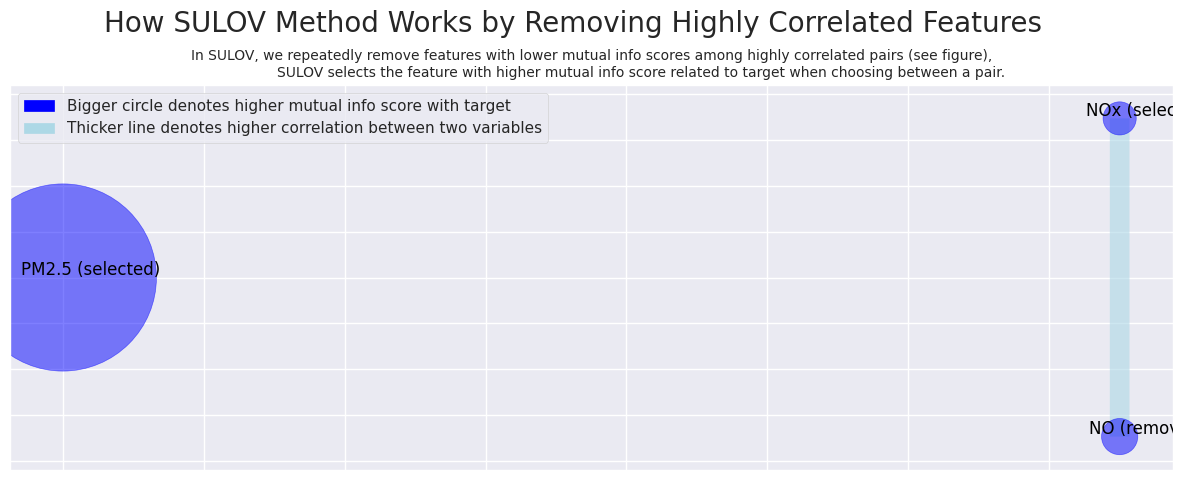

Splitting selected features into float and categorical (integer) variables:
    (12) float variables ...
    (31) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 43 
    Finding Important Features using Boosted Trees algorithm...
        using 43 variables...
        using 34 variables...
        using 25 variables...
        using 16 variables...
        using 7 variables...
Found 21 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  23624 , CV rows =  5907
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Alert! Stacking can pro

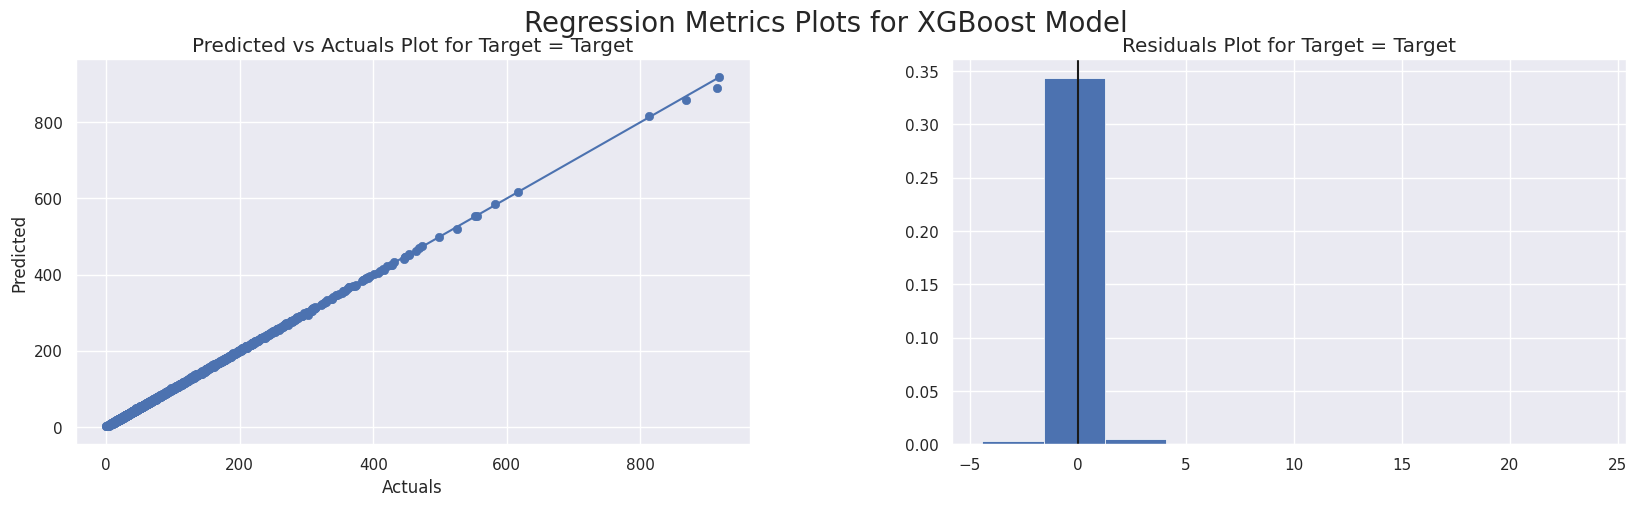

In [ ]:
# Check data types and view the first few rows
train_data = data.copy()  # Make sure to use a copy of the cleaned data
# Define your target variable (y)

train_data['Target'] = train_data['PM2.5']

print("Data Types:")
print(train_data.dtypes)
print("\nFirst Few Rows:")
print(train_data.head())
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_columns)

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))  # Convert to string to avoid issues
    label_encoders[col] = le  # Store the encoder for possible inverse transformation later

# Check for missing values
print("\nMissing Values Before Filling:")
print(train_data.isnull().sum())

# Fill missing values (filling with mean for numeric columns)
train_data.fillna(train_data.mean(), inplace=True)

# Confirm that there are no missing values left
print("\nMissing Values After Filling:")
print(train_data.isnull().sum())

# Check for non-numeric entries in the DataFrame
non_numeric_cols = train_data.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
if non_numeric_cols:
    print("\nNon-numeric columns found:", non_numeric_cols)

# Convert non-numeric columns to numeric if necessary (you can add more encoding methods as needed)
for col in non_numeric_cols:
    train_data[col] = train_data[col].astype(str).apply(lambda x: x.strip())  # Strip spaces
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])  # Label encode again


# Run AutoVIML
from autoviml.Auto_ViML import Auto_ViML
# Run AutoVIML
m, feats, trainm, testm = Auto_ViML(
    train=train_data,
    target='Target',  # Ensure 'Target' is the correct name for your target column
    hyper_param='GS',  # Hyperparameter tuning method
    scoring_parameter='rmse',  # Use rmse for regression
    Boosting_Flag=True,  # Use boosting algorithms
    feature_reduction=True,  # Enable feature reduction
    Stacking_Flag=True,  # Enable stacking
)


best_model = m # m is the best model from the hyperparameter tuning process
train_predictions = best_model.predict(trainm[feats])

# Evaluate the model (example using RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(trainm['Target'], train_predictions, squared=False)
print(f"RMSE on training data: {rmse}")
